In [ ]:
from google.colab import drive

drive.mount('/content/drive') # asdadsad

Mounted at /content/drive


In [ ]:
!dir /content/drive/MyDrive/newfolder

dano_data_upsell\ (4).xlsx  Задание_upsell.pdf			 презентации_задания_Питер.pptx
data.csv		    Критерии-хакатон\ new\ pdf\ (2).pdf


In [282]:
df

,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,...,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg,monthly_income_amt_cat,age_cat
0,39699,1428,06.04.2021,17.0,36.0,CL,73.0,34.0,F,1,...,1195,06.04.2021 15:41,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1,medium_salary,26-49
1,140628,11996,11.05.2021,67.0,24.0,CL,33.0,34.0,M,1,...,17424,18.05.2021 21:09,1-CLC,CLC,67.0,24.0,0.102,1,low_salary,26-49
2,122414,34857,05.06.2021,500.0,60.0,CL,27.0,53.0,F,1,...,33799,05.06.2021 5:41,"1-CL, 2-CLР, 3-CC",CL,100.0,36.0,0.241,1,low_salary,50+
3,40378,94446,08.09.2021,100.0,36.0,CL,7.0,28.0,F,1,...,94123,08.09.2021 19:46,"1-CLР, 2-CLC",To CLC,70.0,36.0,0.105,0,low_salary,26-49
4,161689,116692,10.11.2021,100.0,60.0,CL,10.0,41.0,M,1,...,116232,10.11.2021 11:10,"1-CLC, 2-CLР, 3-CC",To CLC,53.0,60.0,0.172,0,low_salary,26-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,202717,92220,02.09.2021,100.0,36.0,CL,50.0,46.0,M,0,...,91738,02.09.2021 20:56,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0,medium_salary,26-49
225950,169066,116340,09.11.2021,67.0,120.0,CL,10.0,35.0,M,0,...,115937,09.11.2021 14:32,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0,low_salary,26-49
225951,80373,125224,02.12.2021,167.0,36.0,CL,13.0,44.0,M,1,...,124981,03.12.2021 10:28,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.171,1,low_salary,26-49
225952,588,195337,17.09.2022,667.0,36.0,CL,27.0,45.0,F,1,...,194867,17.09.2022 16:33,"1-CL, 2-CLР",To CLR,NaN,NaN,NaN,0,low_salary,26-49


In [286]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/newfolder/data.csv', sep=';', encoding='cp1251')

## Выбросы -----------------------

def dropcol(df, column):
  return df[pd.isnull(df[column]) == False]

df = dropcol(df, 'age')
df = dropcol(df, 'gender_code')
df = dropcol(df, 'req_term')
df = dropcol(df, 'req_amt')


df = df[df['age'] > 18]
df = df[df['age'] < 80]

df['monthly_income_amt_cat'] = df['monthly_income_amt'].apply(lambda x: 'low_salary' if x < 50 else 'medium_salary' if x < 200 else 'high_salary')
df['age_cat'] = df['age'].apply(lambda x: '19-22' if x < 23 else '23-25' if x < 26 else '26-49' if x < 50 else '50+')

In [285]:
df['customer_id'].duplicated().sum()

26586

## Вычисление базовых характеристик людей

Которым одобрили заявку

В основном это люди малого заработка среднего возроста, от 25 до 50

In [111]:
df['monthly_income_amt_cat'] = df['monthly_income_amt'].apply(lambda x: 'low_salary' if x < 50 else 'medium_salary' if x < 200 else 'high_salary')
df['age_cat'] = df['age'].apply(lambda x: '19-22' if x < 23 else '23-25' if x < 26 else '26-49' if x < 50 else '50+')

In [ ]:
df_act = df[df['success_activate_flg'] == 1]

pd.crosstab(df_act['monthly_income_amt_cat'], df_act['age_cat'])


age_cat,high_age,low_age,medium_age
monthly_income_amt_cat,,,
high_salary,97,41,820
low_salary,4732,1890,26207
medium_salary,1344,349,12208


In [ ]:
len(df[(df['age'] > 22) & (df['age'] < 26)])

21475

In [ ]:
pd.DataFrame(df.groupby(['monthly_income_amt_cat', 'age_cat']))

,0,1
0,"(high_salary, high_age)",customer_id application_id applicatio...
1,"(high_salary, low_age)",customer_id application_id applicatio...
2,"(high_salary, medium_age)",customer_id application_id applicatio...
3,"(low_salary, high_age)",customer_id application_id applicatio...
4,"(low_salary, low_age)",customer_id application_id applicatio...
5,"(low_salary, medium_age)",customer_id application_id applicatio...
6,"(medium_salary, high_age)",customer_id application_id applicatio...
7,"(medium_salary, low_age)",customer_id application_id applicatio...
8,"(medium_salary, medium_age)",customer_id application_id applicatio...


<Axes: >

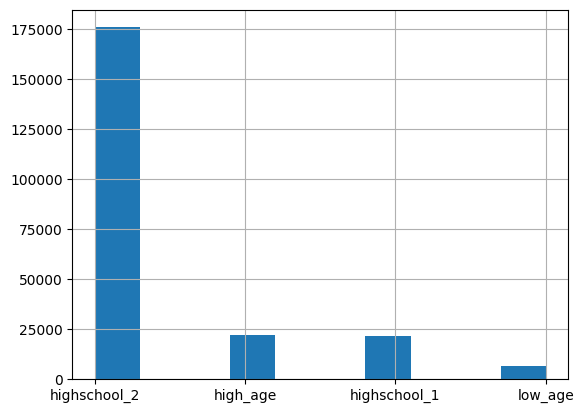

In [ ]:
df['age_cat'].hist()

Понять на какую ЦА рассчитан каждый из кредитных продуктов

In [ ]:
df['age_cat'].value_counts(normalize=True)

age_cat
highschool_2    0.778859
high_age        0.097999
highschool_1    0.095064
low_age         0.028079
Name: proportion, dtype: float64

In [ ]:
# Целевые аудитории по возрасту
d1f = df[df['success_activate_flg'] == 1]
d1f.groupby(['monthly_income_amt_cat', 'age_cat', 'gender_code'])['agreement_product_code'].value_counts(normalize=True)

monthly_income_amt_cat  age_cat     gender_code  agreement_product_code
high_salary             high_age    F            CL                        0.589744
                                                 CLC                       0.128205
                                                 To CLC                    0.128205
                                                 To CLR                    0.076923
                                                 CLR                       0.076923
                                                                             ...   
medium_salary           medium_age  M            CL                        0.456438
                                                 CLC                       0.250901
                                                 To CLC                    0.248924
                                                 To CLR                    0.022566
                                                 CLR                       0.021170
Name

1. **Гипотеза о "демографическом факторе":**  Клиенты младшего возраста склонны выбирать кредиты с более коротким сроком погашения и более высокими процентами.

**Механизм:**
* Молодые люди, возможно, не имеют стабильного дохода и предпочитают брать кредиты на меньшие суммы, которые они могут погасить быстрее.
* **Проверка гипотезы:**
    * Проанализировать среднюю сумму кредита и срок погашения для клиентов разных возрастных групп.
    * Исследовать связь между возрастом и средним процентом по кредитам.

2. **Гипотеза о "стиле жизни":** Клиенты, владеющие автомобилями, склонны брать кредиты с более высокими суммами, чем клиенты без автомобилей.

**Механизм:**
* Предполагается, что наличие автомобиля  говорит о более высоком уровне жизни и потребности в большем количестве денег.
* **Проверка гипотезы:**
    * Проанализировать среднюю сумму кредита для клиентов с наличием и без наличия автомобиля.
    * Провести статистические тесты для проверки значимости различий между группами.

3. Гипотеза о сроках выплаты

* Полагаю, что кредиты под залог ставятся в основном на более длинный промежуток времени, чем с выплатой в наличку или КК.

## Первая гипотеза

Категориальная - Количественная
( age_cat ) ~ ( account_term )

Категориальная - Количественная
( age_cat ) ~ ( account_rate )

Переменные не нормальны, использую метод Краскела Уоллеса

In [ ]:
# Проверка на нормальность


df1 = df[df['success_activate_flg'] == 1]

low_ = df1[df1['age_cat'] == 'low_age']['account_rate']
medium_ = df1[df1['age_cat'] == 'medium_age']['account_rate']
high_ = df1[df1['age_cat'] == 'high_age']['account_rate']

df.isna().sum()

customer_id                    0
application_id                 0
application_dttm               0
req_amt                      237
req_term                     187
req_product_code               0
monthly_income_amt         10673
age                            0
gender_code                    0
car_flg                        0
car_price                 120592
realty_flg                     0
realty_price              193230
cc_flg                         0
cl_approve_amt            142152
cl_rate                   142152
clc_approve_amt           192198
clc_rate                  192198
clr_approve_amt            15325
clr_rate                   15328
cc_approve_amt             54216
agreement_id                   0
agreement_dttm                 0
product_sale_priority          0
agreement_product_code         0
account_amt               165354
account_term              165354
account_rate              165354
success_activate_flg           0
monthly_income_amt_cat         0
age_cat   

{'whiskers': [<matplotlib.lines.Line2D at 0x79e90cae8ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x79e90cae9000>,
 'boxes': [<matplotlib.lines.Line2D at 0x79e90cae8820>],
 'medians': [<matplotlib.lines.Line2D at 0x79e90cae9540>],
 'fliers': [<matplotlib.lines.Line2D at 0x79e90cae97e0>],
 'means': []}

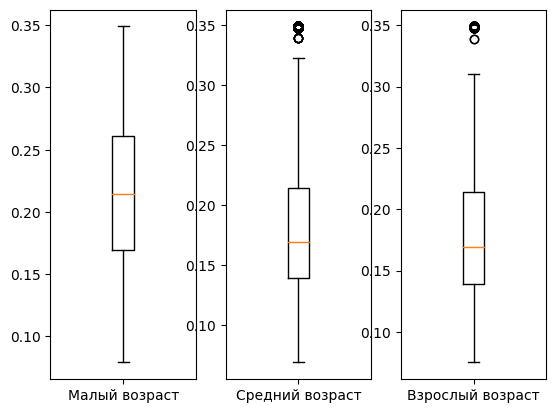

<Figure size 600x500 with 0 Axes>

In [ ]:
figure, axis = plt.subplots(1, 3)
plt.figure(figsize=(6, 5))

axis[0].boxplot(low_, labels=['Малый возраст'])
axis[1].boxplot(medium_, labels=['Средний возраст'])
axis[2].boxplot(high_, labels=['Взрослый возраст'])

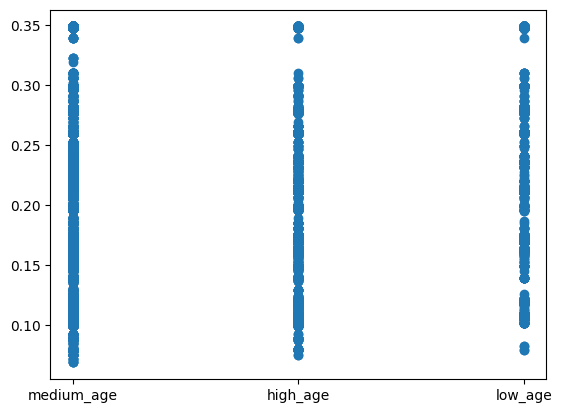

In [ ]:
# Клиенты младшего возраста склонны брать кредиты с меньшим сроком

from matplotlib import pyplot as plt

plt.scatter(df1['age_cat'], df1['account_rate'])

In [ ]:
# Метод Краскелла Уоллиса для вычисления p-value

from scipy.stats import kruskal

kruskal(low_, medium_, high_)

KruskalResult(statistic=710.0204972608889, pvalue=6.622287033549733e-155)

Тест на значимость между возрастом и сроком

image.png

Тест на значимость между возрастом и процентами

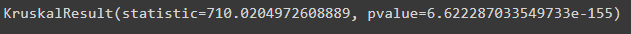

## Гипотеза номер 2

Бинарная - Количественная

car_flg ~ account_amt

Данные распределены ненормально, метод Краскелла Уоллеса отлично сработает.

<Axes: >

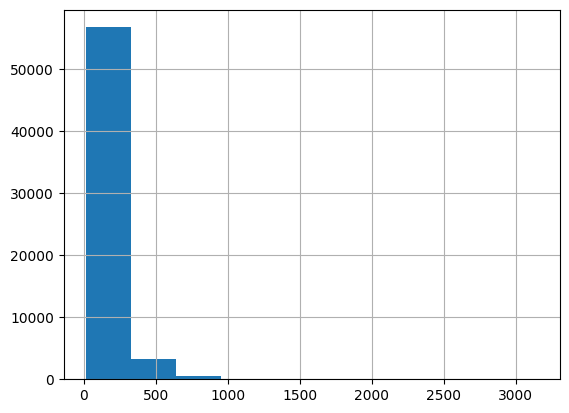

In [ ]:
# Проверка на нормальность

df['account_amt'].hist()

In [ ]:
car_ = df[df['car_flg'] == 1]['account_amt']
car_

0          57.0
1          67.0
2         100.0
3          70.0
4          53.0
          ...  
225946      NaN
225947     86.0
225951    159.0
225952      NaN
225953    669.0
Name: account_amt, Length: 110891, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x79e9075f5360>,
 'caps': [<matplotlib.lines.Line2D at 0x79e9075f58a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79e9075f50c0>],
 'medians': [<matplotlib.lines.Line2D at 0x79e9075f5de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79e9075f6080>],
 'means': []}

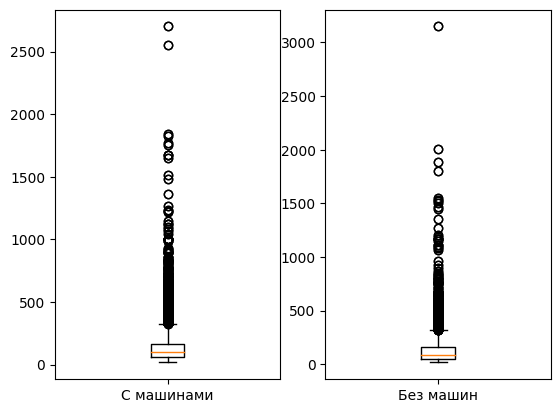

In [ ]:
car_ = df[(df['car_flg'] == 1) ]['account_amt'].dropna()
not_car_ = df[(df['car_flg'] == 0) ]['account_amt'].dropna()

figure, axis = plt.subplots(1, 2)

axis[0].boxplot(car_, labels=['С машинами'])
axis[1].boxplot(not_car_, labels=['Без машин'])

In [ ]:
# Статистическая значимость по Краскеллу Уоллису

import scipy

scipy.stats.mannwhitneyu(car_, not_car_)

MannwhitneyuResult(statistic=479796967.0, pvalue=3.638379462990302e-108)

## Клиенты, использующие кредит для **долгосрочных** инвестиций (например, покупка недвижимости, образование), чаще соглашаются на UpSell кредита с более высокой суммой и более **длительным сроком**.

Верхняя планка: 2.5H = 84.0


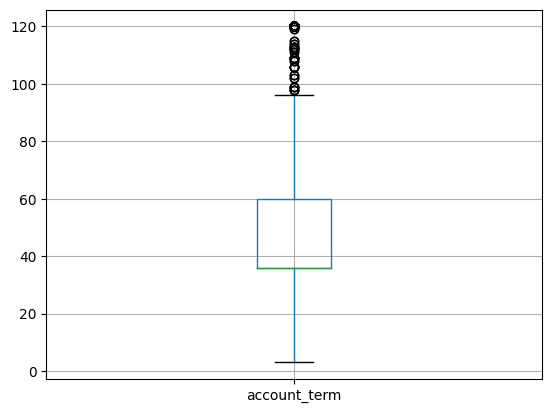

In [ ]:
# Проверка гипотезы

df.boxplot('account_term')

# Долгосрочные инвестиции - от 2-3H
median = df['account_term'].median()
q1 = df['account_term'].quantile(0.75)
q2 = df['account_term'].quantile(0.25)

H = q1 - q2
toph =  median + 2 * H
print("Верхняя планка: 2.5H =", toph)


медиана + тройной интерквартильный размах = **84**
это планка от которой идёт отсчёт людей с длительными кредитами

<Axes: >

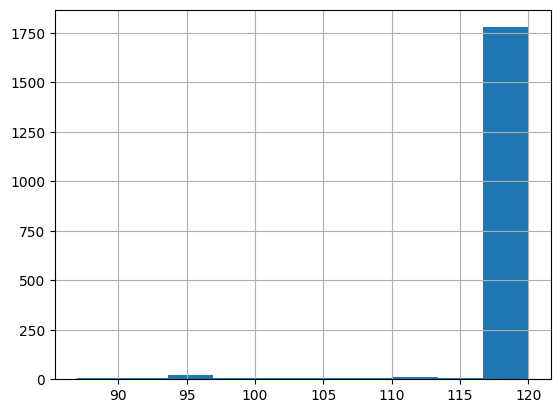

In [ ]:
df[df['account_term'] > toph]['account_term'].hist()

In [ ]:
df[df['account_term'] > 110]

,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,...,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg,monthly_income_amt_cat,age_cat
27,30437,49985,24.06.2021,433.0,120.0,CL,43.0,38.0,M,0,...,49776,24.06.2021 18:26,1-CLР,CLR,485.0,120.0,0.166,1,low_salary,medium_age
74,109228,114227,03.11.2021,267.0,120.0,CL,17.0,27.0,M,0,...,113957,03.11.2021 16:20,1-CLР,CLR,109.0,120.0,0.121,0,low_salary,medium_age
83,120756,151045,17.02.2022,100.0,60.0,CL,20.0,26.0,F,0,...,151210,18.02.2022 11:52,1-CLР,CLR,134.0,120.0,0.124,0,low_salary,medium_age
180,214175,205701,17.10.2022,217.0,60.0,CL,20.0,22.0,F,1,...,205968,18.10.2022 18:49,1-CLР,CLR,222.0,120.0,0.273,0,low_salary,low_age
386,59418,53076,29.06.2021,667.0,60.0,CL,22.0,48.0,M,0,...,57783,08.07.2021 10:33,1-CLР,CLR,649.0,120.0,0.171,1,low_salary,medium_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225136,40764,37720,08.06.2021,350.0,60.0,CL,23.0,40.0,F,0,...,39531,11.06.2021 10:42,1-CLР,CLR,468.0,120.0,0.118,1,low_salary,medium_age
225728,45319,17499,18.05.2021,1000.0,24.0,CL,200.0,66.0,M,1,...,17034,18.05.2021 13:52,"1-CL, 2-CLР, 3-CC",To CLR,819.0,120.0,0.118,1,high_salary,high_age
225772,176450,96433,14.09.2021,333.0,36.0,CL,33.0,35.0,M,1,...,97287,17.09.2021 14:03,1-CLР,CLR,593.0,120.0,0.174,1,low_salary,medium_age
225807,39291,192983,11.09.2022,150.0,120.0,CL,93.0,26.0,F,1,...,192504,11.09.2022 17:46,1-CLР,CLR,184.0,120.0,0.207,1,medium_salary,medium_age


agreement_product_code
CLR       0.5
To CLR    0.5
Name: proportion, dtype: float64

Срок  - account_term

Сумма - account_amt

account_term ~ agreement_product_code

account_amt ~ agreement_product_code

In [ ]:
df1 = df[df['account_amt'] > 0]

df1['agreement_product_code'].unique()

array(['To CLC', 'CLC', 'CL', 'CLR', 'To CLR'], dtype=object)

([<matplotlib.patches.Wedge at 0x79e9099dcc70>,
 [Text(6.735557395310444e-17, 1.1, 'To CLR'),
  Text(-2.0206672185931328e-16, -1.1, 'CLR')],
 [Text(3.6739403974420595e-17, 0.6, '50.0'),
  Text(-1.1021821192326178e-16, -0.6, '50.0')])

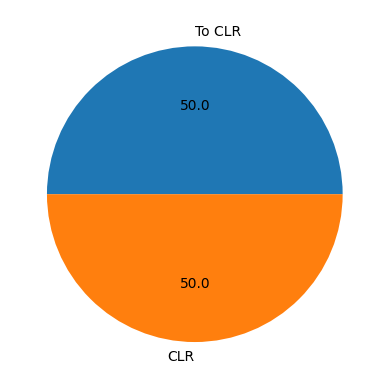

In [ ]:

hp = 1000
plt.pie(df[df['account_amt'] > hp]['agreement_product_code'].value_counts(normalize=True),
        labels=df[df['account_amt'] > hp]['agreement_product_code'].unique(),
        autopct='%.1f')

([<matplotlib.patches.Wedge at 0x7de1731c5960>,
 [Text(-0.3911581979387832, 1.0281027498189488, 'To CLC'),
  Text(-0.43344950597076487, -1.0110002600265244, 'CLC'),
  Text(0.34854787493251566, -1.0433189248163899, 'CL'),
  Text(0.7931836120479474, -0.7621415600651702, 'Unsuccess'),
  Text(0.9988571934028894, -0.46074321176475624, 'CLR'),
  Text(1.0837463226682427, -0.18839826990464, 'CC'),
  Text(1.0996401205165236, -0.028135482053906213, 'To CLR')],
 [Text(-0.2133590170575181, 0.5607833180830629, '61.6'),
  Text(-0.23642700325678082, -0.5514546872871952, '14.0'),
  Text(0.19011702269046307, -0.5690830498998489, '9.2'),
  Text(0.4326456065716076, -0.4157135782173655, '6.2'),
  Text(0.544831196401576, -0.25131447914441246, '4.4'),
  Text(0.5911343578190413, -0.10276269267525817, '3.9'),
  Text(0.5998037020999218, -0.01534662657485793, '0.8')])

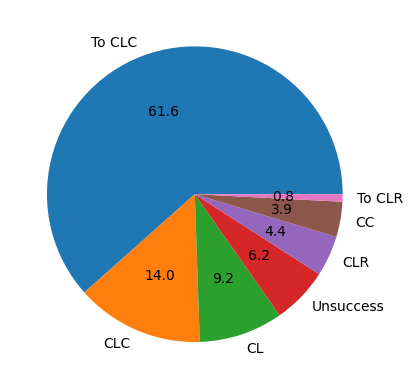

In [ ]:
## Зависимость того, какой вид кредитования выбран от того, какая ЗП у клиента.
from matplotlib import pyplot as plt

labels = df[df['account_term'] > 60]['agreement_product_code']
plt.pie(labels.value_counts(normalize=True), autopct='%.1f', labels=labels.unique())


##  Клиенты, которые уже имеют положительный опыт сотрудничества с банком (например, наличие депозита, других кредитов), чаще соглашаются на UpSell кредита.



In [ ]:
## Понять, какая доля

In [ ]:
df['age'].describe()

count    225901.000000
mean         35.974692
std           9.613893
min          19.000000
25%          29.000000
50%          35.000000
75%          41.000000
max          73.000000
Name: age, dtype: float64

<Axes: >

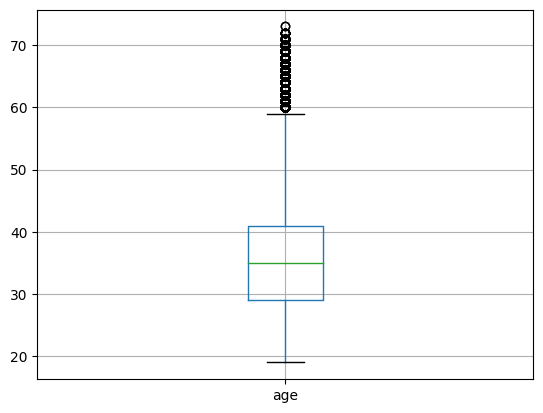

In [ ]:
df.boxplot('age')

UpSell - это To CLR или To CLC

In [ ]:
df[df['cc_flg'] == 1]

,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,...,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
0,39699,1428,06.04.2021,17.0,36.0,CL,73.0,34.0,F,1,...,0.169,47.0,1195,06.04.2021 15:41,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1
1,140628,11996,11.05.2021,67.0,24.0,CL,33.0,34.0,M,1,...,NaN,NaN,17424,18.05.2021 21:09,1-CLC,CLC,67.0,24.0,0.102,1
3,40378,94446,08.09.2021,100.0,36.0,CL,7.0,28.0,F,1,...,0.176,NaN,94123,08.09.2021 19:46,"1-CLР, 2-CLC",To CLC,70.0,36.0,0.105,0
4,161689,116692,10.11.2021,100.0,60.0,CL,10.0,41.0,M,1,...,0.171,8.0,116232,10.11.2021 11:10,"1-CLC, 2-CLР, 3-CC",To CLC,53.0,60.0,0.172,0
5,44626,141028,18.01.2022,1333.0,120.0,CL,33.0,35.0,F,1,...,0.180,47.0,140760,18.01.2022 15:03,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225948,139995,49724,23.06.2021,67.0,36.0,CL,33.0,32.0,F,0,...,0.148,14.0,49384,24.06.2021 11:15,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225949,202717,92220,02.09.2021,100.0,36.0,CL,50.0,46.0,M,0,...,0.169,47.0,91738,02.09.2021 20:56,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225951,80373,125224,02.12.2021,167.0,36.0,CL,13.0,44.0,M,1,...,0.171,27.0,124981,03.12.2021 10:28,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.171,1
225952,588,195337,17.09.2022,667.0,36.0,CL,27.0,45.0,F,1,...,0.207,NaN,194867,17.09.2022 16:33,"1-CL, 2-CLР",To CLR,NaN,NaN,NaN,0


([<matplotlib.patches.Wedge at 0x7de168df3c40>,
 [Text(-1.0999883521901213, 0.005062118732493607, 'CL'),
  Text(1.0999863899081277, -0.005471929904955519, 'CLC'),
  Text(1.0999999236894036, -0.00040973565423182496, 'CLR')],
 [Text(-0.599993646649157, 0.0027611556722692394, '99.9'),
  Text(0.5999925763135241, -0.002984689039066646, '0.1'),
  Text(0.5999999583760383, -0.00022349217503554085, '0.0')])

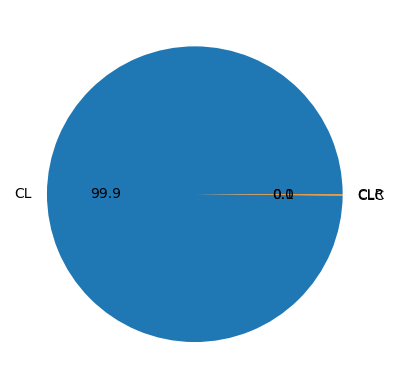

In [ ]:
f = df[df['cc_flg'] == 1]['req_product_code']
plt.pie(f.value_counts(normalize=True), autopct='%.1f', labels=f.unique())

## Разбиение по категориям

Возрастная группа

In [204]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/newfolder/data.csv', sep=';', encoding='cp1251')

## Выбросы -----------------------

def dropcol(df, column):
  return df[pd.isnull(df[column]) == False]

df = dropcol(df, 'age')
df = dropcol(df, 'gender_code')
df = dropcol(df, 'req_term')
df = dropcol(df, 'req_amt')


df = df[df['age'] > 18]
df = df[df['age'] < 80]

df['monthly_income_amt_cat'] = df['monthly_income_amt'].apply(lambda x: 'low_salary' if x < 50 else 'medium_salary' if x < 200 else 'high_salary')
df['age_cat'] = df['age'].apply(lambda x: '19-22' if x < 23 else '23-25' if x < 26 else '26-49' if x < 50 else '50+')

In [85]:
df['age_cat'].unique()

array(['26-49', '50+', '23-25', '19-22'], dtype=object)

In [155]:
df = df[df['agreement_product_code'] != "CLR"]
df = df[df['agreement_product_code'] != "CLC"]

In [152]:
df = df[df['agreement_product_code'] != 'Unsuccess']

In [158]:
df['age_cat'].unique()

array(['26-49', '50+', '23-25', '19-22'], dtype=object)

([<matplotlib.patches.Wedge at 0x7de16121ccd0>,
 [Text(-0.8272328579884456, 0.7250419289008522, 'CL'),
  Text(0.5718250604307562, -0.9396893637066253, 'To CLR'),
  Text(1.0494060616718328, -0.3297679755925576, 'To CLC')],
 [Text(-0.4512179225391521, 0.3954774157641011, '77.1'),
  Text(0.31190457841677605, -0.5125578347490682, '13.2'),
  Text(0.5724033063664542, -0.17987344123230412, '9.7')])

<Figure size 2400x6400 with 0 Axes>

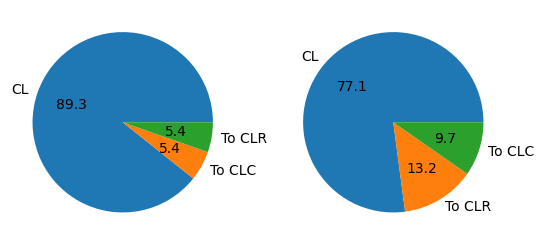

In [160]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure = figure(figsize=(30, 80), dpi=80)
figure, ax = plt.subplots(1, 2)

f = df[(df['cc_flg'] == 0) & (df['success_activate_flg'] == 1) & (df['age_cat'] == '19-22')]['agreement_product_code']
ax[0].pie(f.value_counts(normalize=True), autopct='%.1f', labels=f.unique())

f = df[(df['cc_flg'] == 0) & (df['success_activate_flg'] == 1) & (df['age_cat'] == '23-25')]['agreement_product_code']
ax[1].pie(f.value_counts(normalize=True), autopct='%.1f', labels=f.unique())


([<matplotlib.patches.Wedge at 0x7de1611d9000>,
 [Text(-0.8410186862310708, 0.7090046328552191, 'CL'),
  Text(0.666317472281607, -0.875226271390576, 'To CLC'),
  Text(1.0735681597588589, -0.2396902299885779, 'To CLR')],
 [Text(-0.45873746521694764, 0.38672979973921034, '77.7'),
  Text(0.36344589397178556, -0.4773961480312232, '15.3'),
  Text(0.5855826325957412, -0.1307401254483152, '7.0')])

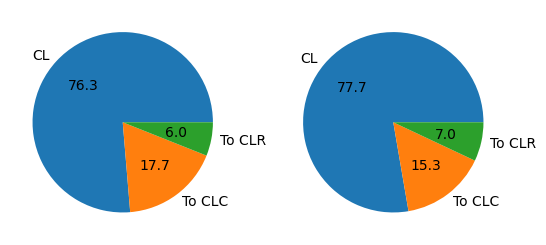

In [161]:

figure, ax = plt.subplots(1, 2)

f = df[(df['cc_flg'] == 0) & (df['success_activate_flg'] == 1) & (df['age_cat'] == '26-49')]['agreement_product_code']
ax[0].pie(f.value_counts(normalize=True), autopct='%.1f', labels=f.unique())

f = df[(df['cc_flg'] == 0) & (df['success_activate_flg'] == 1) & (df['age_cat'] == '50+')]['agreement_product_code']
ax[1].pie(f.value_counts(normalize=True), autopct='%.1f', labels=f.unique())

In [142]:
df.groupby(['gender_code', 'age_cat'])['agreement_product_code'].value_counts(normalize=True)

gender_code  age_cat  agreement_product_code
F            19-22    Unsuccess                 0.739608
                      CL                        0.091746
                      CC                        0.090855
                      To CLR                    0.050475
                      To CLC                    0.027316
             23-25    Unsuccess                 0.760052
                      CL                        0.111085
                      CC                        0.057988
                      To CLR                    0.038062
                      To CLC                    0.032812
             26-49    Unsuccess                 0.679391
                      CL                        0.168682
                      To CLC                    0.072223
                      CC                        0.040716
                      To CLR                    0.038988
             50+      Unsuccess                 0.575875
                      CL                   

([<matplotlib.patches.Wedge at 0x7de1681e87f0>,
 [Text(-0.5584025785233178, 0.9477270494707377, 'Unsuccess'),
  Text(-0.15892777971913674, -1.0884585250865306, 'CLC'),
  Text(0.5566474236348867, -0.9487590029931959, 'CL'),
  Text(0.9231039026037481, -0.5982300435432261, 'To CLC'),
  Text(1.0527081811709964, -0.3190697185501201, 'CC'),
  Text(1.0953553452884333, -0.10097854994035906, 'To CLR'),
  Text(1.0999464040134472, -0.010858558738925545, 'CLR')],
 [Text(-0.3045832246490824, 0.5169420269840387, '66.9'),
  Text(-0.08668787984680186, -0.5937046500471985, '11.5'),
  Text(0.3036258674372109, -0.5175049107235613, '10.0'),
  Text(0.5035112196020444, -0.32630729647812323, '4.8'),
  Text(0.574204462456907, -0.17403802830006548, '4.1'),
  Text(0.5974665519755089, -0.05507920905837766, '2.3'),
  Text(0.5999707658255166, -0.005922850221232115, '0.3')])

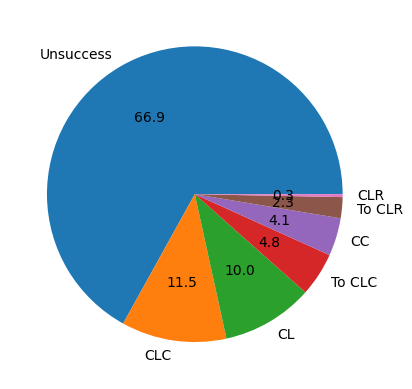

In [ ]:
f = df[(df['cc_flg'] == 1) & (df['age_cat'] == 'low_age')]['agreement_product_code']
plt.pie(f.value_counts(normalize=True), autopct='%.1f', labels=f.unique())

<Axes: >

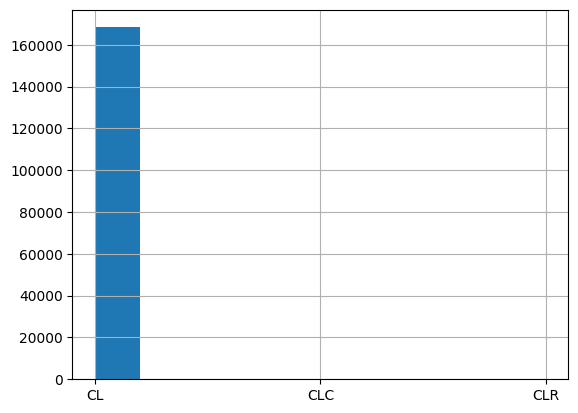

In [ ]:
# Проверка на нормальность

f.hist() # Данные распределены ненормально

In [ ]:
from scipy.stats import kruskal

tclc = df[(df['cc_flg'] == 1) & (df['agreement_product_code'] == 'To CLC')]

tclc

,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,...,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
0,39699,1428,06.04.2021,17.0,36.0,CL,73.0,34.0,F,1,...,0.169,47.0,1195,06.04.2021 15:41,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1
3,40378,94446,08.09.2021,100.0,36.0,CL,7.0,28.0,F,1,...,0.176,NaN,94123,08.09.2021 19:46,"1-CLР, 2-CLC",To CLC,70.0,36.0,0.105,0
4,161689,116692,10.11.2021,100.0,60.0,CL,10.0,41.0,M,1,...,0.171,8.0,116232,10.11.2021 11:10,"1-CLC, 2-CLР, 3-CC",To CLC,53.0,60.0,0.172,0
8,186546,210358,29.10.2022,67.0,36.0,CL,27.0,46.0,M,1,...,0.270,NaN,209962,29.10.2022 10:00,"1-CL, 2-CLC, 3-CLР",To CLC,67.0,36.0,0.199,1
20,108217,100683,25.09.2021,183.0,60.0,CL,40.0,44.0,M,1,...,0.176,NaN,100293,25.09.2021 14:28,"1-CL, 2-CLC, 3-CLР",To CLC,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225891,17906,125454,03.12.2021,100.0,36.0,CL,27.0,39.0,M,1,...,0.171,NaN,124825,03.12.2021 15:45,"1-CLР, 2-CLC",To CLC,NaN,NaN,NaN,0
225892,219273,129162,14.12.2021,200.0,24.0,CL,20.0,46.0,F,1,...,NaN,28.0,128985,14.12.2021 17:50,"1-CLC, 2-CL, 3-CC",To CLC,NaN,NaN,NaN,0
225901,173273,40567,11.06.2021,167.0,36.0,CL,23.0,42.0,M,1,...,0.174,NaN,39869,11.06.2021 16:48,"1-CLC, 2-CLР",To CLC,190.0,60.0,0.164,1
225929,157176,188619,29.08.2022,100.0,36.0,CL,20.0,26.0,M,1,...,0.207,NaN,188081,29.08.2022 19:59,"1-CLР, 2-CLC",To CLC,NaN,NaN,NaN,0


In [ ]:
df['req_product_code'].value_counts()

req_product_code
CL     225567
CLC       310
CLR        24
Name: count, dtype: int64

In [ ]:
len(df[df['agreement_product_code'] == 'CL'])

30270

<Axes: >

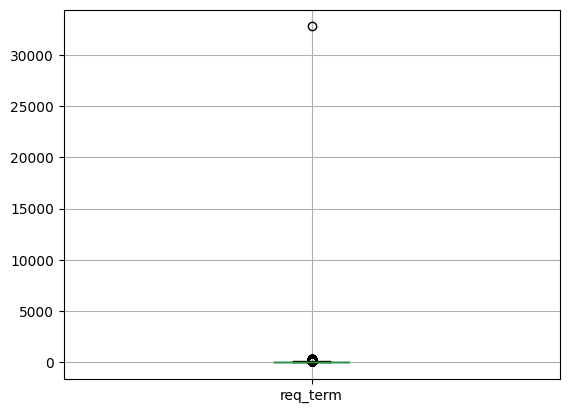

In [67]:
df.boxplot('req_term')

In [72]:
df['age_cat'].value_counts(normalize=True)

age_cat
26-49    0.778853
50+      0.097991
23-25    0.095071
19-22    0.028086
Name: proportion, dtype: float64

In [127]:
len(df[(df['cc_flg'] == 1) & (df['req_product_code'] == 'CC')])

0

In [143]:
df[(df['cc_flg'] == 1) & (df['success_activate_flg'] == 1)]

,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,...,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg,monthly_income_amt_cat,age_cat
0,39699,1428,06.04.2021,17.0,36.0,CL,73.0,34.0,F,1,...,1195,06.04.2021 15:41,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1,medium_salary,26-49
6,50471,147808,08.02.2022,117.0,36.0,CL,23.0,42.0,M,1,...,147589,08.02.2022 10:52,"1-CL, 2-CLР",CL,133.0,60.0,0.175,1,low_salary,26-49
8,186546,210358,29.10.2022,67.0,36.0,CL,27.0,46.0,M,1,...,209962,29.10.2022 10:00,"1-CL, 2-CLC, 3-CLР",To CLC,67.0,36.0,0.199,1,low_salary,26-49
9,79792,17859,18.05.2021,167.0,36.0,CL,33.0,37.0,M,1,...,17014,18.05.2021 13:58,"1-CL, 2-CLР",CL,57.0,36.0,0.211,1,low_salary,26-49
12,64609,44589,16.06.2021,318.0,60.0,CL,22.0,53.0,M,0,...,43434,16.06.2021 19:00,"1-CL, 2-CLР",CL,144.0,36.0,0.169,1,low_salary,50+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225935,204849,51648,26.06.2021,167.0,36.0,CL,20.0,46.0,M,0,...,51038,26.06.2021 19:32,"1-CL, 2-CLР",CL,110.0,36.0,0.169,1,low_salary,26-49
225939,58443,88884,25.08.2021,50.0,24.0,CL,27.0,37.0,F,0,...,88408,25.08.2021 11:13,"1-CLР, 2-CLC",To CLC,67.0,60.0,0.109,1,low_salary,26-49
225947,42140,11518,11.05.2021,500.0,60.0,CL,57.0,41.0,M,1,...,10781,11.05.2021 10:51,"1-CL, 2-CLР",CL,86.0,36.0,0.211,1,medium_salary,26-49
225951,80373,125224,02.12.2021,167.0,36.0,CL,13.0,44.0,M,1,...,124981,03.12.2021 10:28,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.171,1,low_salary,26-49


In [147]:
df[df['agreement_product_code'] == 'CC'].value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)

In [146]:
df['agreement_product_code'].value_counts()

agreement_product_code
Unsuccess    141927
CL            30241
To CLC        20092
CC             9599
To CLR         8615
Name: count, dtype: int64

In [148]:
len(df[df['car_flg'] == 1])

99463

In [149]:
df['agreement_product_code'].value_counts()

agreement_product_code
Unsuccess    141927
CL            30241
To CLC        20092
CC             9599
To CLR         8615
Name: count, dtype: int64

In [162]:
df['age_cat'].unique()

array(['26-49', '50+', '23-25', '19-22'], dtype=object)

In [297]:
# Есть ли кредитка, Возрастная группа,

# % upsale = To CLR + To CLC / количество наблюдений
ages = list(range(19, 50))
df1 = df[(df['cc_flg'] == 1)]
values = []
ages__ = []
ss = 0
for age in ages:
  df__ = df1[df1['age'] == age]
  toclc = df__[(df__['agreement_product_code'] == 'To CLR') | (df__['agreement_product_code'] == 'To CLC')]
  try:
    npercent = int(len(toclc) / len(df__) * 100)
    values.append(npercent)
    ages__.append(age)
  except Exception as err:
    ages__.pop()
    ages__.pop()
    pass

print(len(df1))

df1 = df[(df['cc_flg'] == 0)]
values_1 = []
for age in ages:
  df__ = df1[df1['age'] == age]
  toclc = df__[(df__['agreement_product_code'] == 'To CLR') | (df__['agreement_product_code'] == 'To CLC')]
  try:
    npercent = int(len(toclc) / len(df__) * 100)
    values_1.append(npercent)
  except Exception as err:
    pass

168436


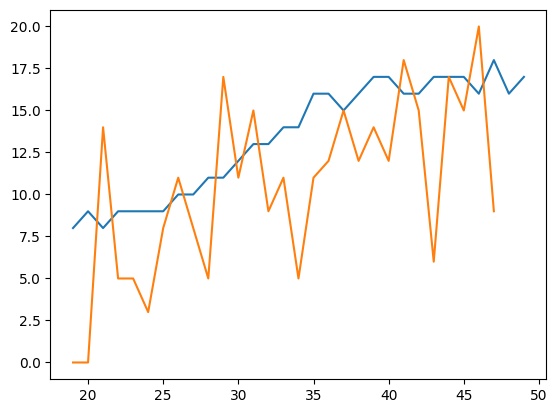

In [233]:
from matplotlib import pyplot as plt

plt.plot(ages__, values)

ages__.pop()
ages__.pop()
plt.plot(ages__, values_1)


In [242]:
import numpy as np

plt.plot(ages__, values)

ages__.pop()
ages__.pop()

np.corrcoef(ages__, values)
plt.plot(ages__, values_1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 29 and the array at index 1 has size 31

p-value credit card, 0.026195097429117686 
Rsquare, 0.8878473581213306
 
p-value nocredit card, 0.29793860454651794 
Rsquare, 0.7724024756189047


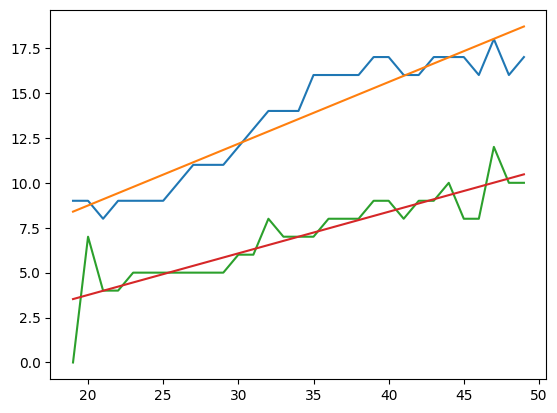

In [298]:
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model1 = LinearRegression()
# Data

# Extract features and target
X = ages__
y = values


X1 = ages__
y1 = values_1
# Add constant to predictor


# Fit model
model.fit(np.array(X).reshape(-1, 1), np.array(y).reshape(-1, 1))
model1.fit(np.array(X1).reshape(-1, 1), np.array(y1).reshape(-1, 1))


from matplotlib import pyplot as plt

plt.plot(ages__, values)
plt.plot(ages__, [x * model.coef_[0] + model.intercept_[0] for x in ages__])

plt.plot(ages__, values_1)
plt.plot(ages__, [x * model1.coef_[0] + model1.intercept_[0] for x in ages__])

import statsmodels.api as sm

Xconst = sm.add_constant(X)
model = sm.OLS(y, Xconst).fit()

print('p-value credit card,',model.pvalues[0], '\nRsquare,', model.rsquared)
print(' ')
Xconst = sm.add_constant(X1)
model1 = sm.OLS(y1, Xconst).fit()

print('p-value nocredit card,', model1.pvalues[0], '\nRsquare,', model1.rsquared)

In [273]:
import statsmodels.api as sm

Xconst = sm.add_constant(X)
model = sm.OLS(y, Xconst).fit()

print('p-value credit card,',model.pvalues[0], '\nRsquare,', model.rsquared)
print(' ')
Xconst = sm.add_constant(X1)
model1 = sm.OLS(y1, Xconst).fit()

print('p-value nocredit card,', model1.pvalues[0], '\nRsquare,', model1.rsquared)

p-value credit card, 0.026195097429117686 
Rsquare, 0.8878473581213306
 
p-value nocredit card, 0.29793860454651794 
Rsquare, 0.7724024756189047


In [260]:
model.coef_
model.intercept_


array([1.86774194])

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_predi

In [ ]:
from sklearn import Linear